The dataset I analyzed is noshowappointments-kagglev2-may-2016.csv

Project: No-show Appointments.

Introduction: 
This project will be analyzing data associated with patients and some diseases. In particular, we will be interested in finding:

What factors are important for us to know in order top redict if a patient willshow up for their scheduled appointment?
what day the patient set up their appointment?
where is the location of the hospital?
Did the patients enroll in Brasilian welfare?
Did the patient show up or not?

In [46]:
# use this cell to set up import statements for all of the packages that you plan
import pandas as pd 
import numpy as py
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [47]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [48]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [49]:
df.shape

(110527, 14)

In [50]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There ara .32 of patients recieved the SMS_recieved,
over 50% of age are more than 37.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Data Wrangling

In [52]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

There are no null values, data do not need to clean.

Question 1:
What factors are important for us to know in order top redict if a patient willshow up for their scheduled appointment?

SMS_received is the dependent variable and other columns are independent variables.

In [53]:
SMS_received = df.SMS_received == True
not_SMS_received = df.SMS_received == False

In [54]:
df.Age[SMS_received].mean()

37.513809819063184

In [55]:
df.Age[not_SMS_received].mean()

36.88796055699913

Text(0, 0.5, 'SMS_received')

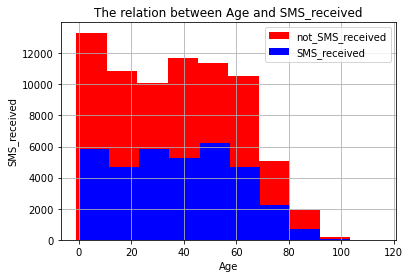

In [56]:
df.Age[not_SMS_received].hist(label = 'not_SMS_received', color = 'red')
df.Age[SMS_received].hist(label = 'SMS_received', color = 'blue');
plt.legend();
plt.title("The relation between Age and SMS_received")
plt.xlabel("Age")
plt.ylabel("SMS_received")

The people which received the SMS less than people did not receive the SMS.
Right skewed.

Question 2:
what day the patient set up their appointment?

Text(0, 0.5, 'SMS_received')

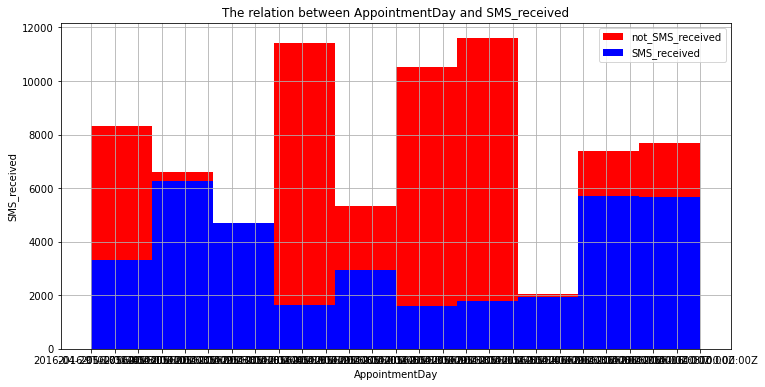

In [57]:
df.AppointmentDay[not_SMS_received].hist(label = 'not_SMS_received', color = 'red', figsize = (15,7))
df.AppointmentDay[SMS_received].hist(label = 'SMS_received', color = 'blue', figsize = (12,6));
plt.legend();
plt.title("The relation between AppointmentDay and SMS_received")
plt.xlabel("AppointmentDay")
plt.ylabel("SMS_received")

People with the red color did not set up their appointment 

Question 2:
what day the patient set up their appointment?

Text(0, 0.5, 'SMS_received')

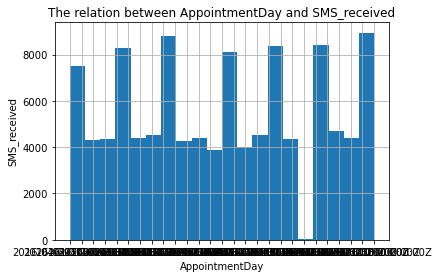

In [58]:
df.AppointmentDay.hist(bins = 20)
plt.title("The relation between AppointmentDay and SMS_received")
plt.xlabel("AppointmentDay")
plt.ylabel("SMS_received")

Question 3:
where is the location of the hospital?

Text(0, 0.5, 'SMS_received')

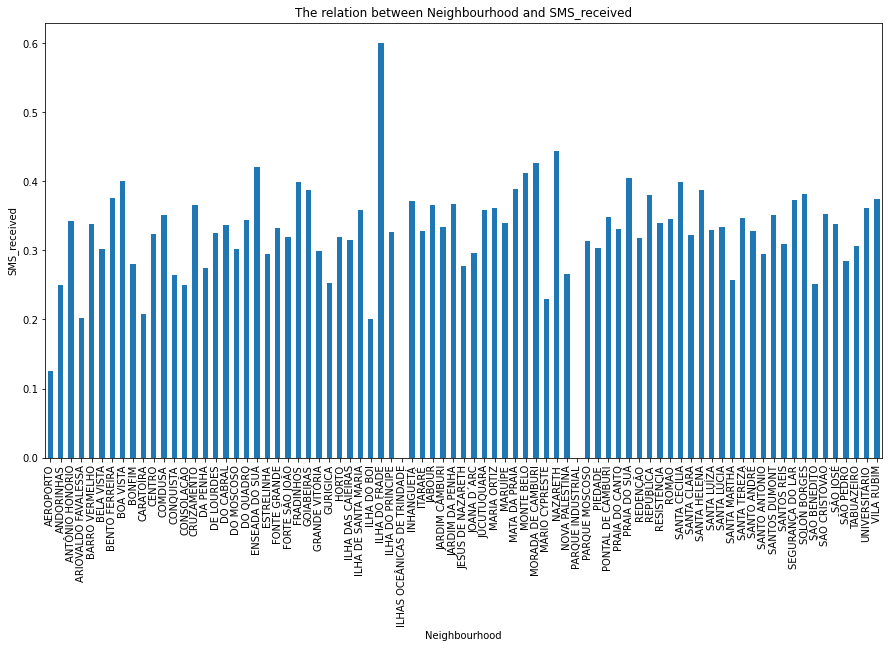

In [59]:
df.groupby('Neighbourhood').SMS_received.mean().plot(kind = 'bar', figsize = (15,8));
plt.title("The relation between Neighbourhood and SMS_received")
plt.xlabel("Neighbourhood")
plt.ylabel("SMS_received")

    ILHA DO FRADE most Neighbourhood recieved the SMS.

Text(0, 0.5, 'SMS_received')

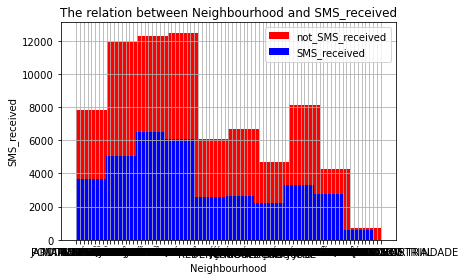

In [60]:
df.Neighbourhood[not_SMS_received].hist(label = 'not_SMS_received', color = 'red')
df.Neighbourhood[SMS_received].hist(label = 'SMS_received', color = 'blue');
plt.legend();
plt.title("The relation between Neighbourhood and SMS_received")
plt.xlabel("Neighbourhood")
plt.ylabel("SMS_received")

Text(0, 0.5, 'SMS_received')

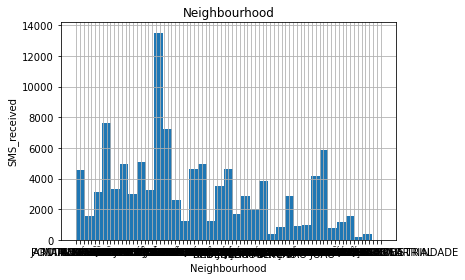

In [61]:
df.Neighbourhood.hist(bins = 35);
plt.title("Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("SMS_received")

Question 4:
Did the patients enroll in Brasilian welfare?

Text(0, 0.5, 'SMS_received')

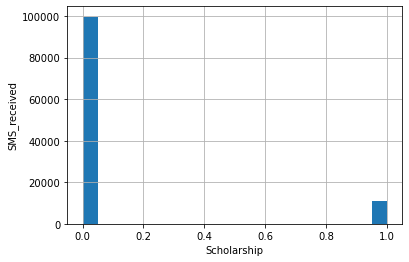

In [62]:
df.Scholarship.hist(bins = 20);
plt.xlabel("Scholarship")
plt.ylabel("SMS_received")

In [63]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

Most patients not enrolled in Brasilian welfare, 10861 are enrolled in Brasilian welfare.

Text(0, 0.5, 'SMS_received')

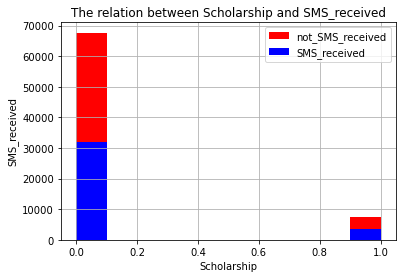

In [64]:
df.Scholarship[not_SMS_received].hist(label = 'not_SMS_received', color = 'red')
df.Scholarship[SMS_received].hist(label = 'SMS_received', color = 'blue');
plt.legend();
plt.title("The relation between Scholarship and SMS_received")
plt.xlabel("Scholarship")
plt.ylabel("SMS_received")

The blue color means the patients which received the SMS in male and female, the green color means total patients.

Text(0, 0.5, 'SMS_received_mean')

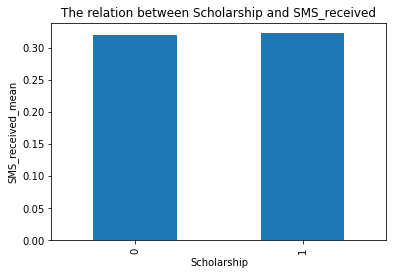

In [65]:
df.groupby('Scholarship').SMS_received.mean().plot(kind = 'bar');
plt.title("The relation between Scholarship and SMS_received")
plt.xlabel("Scholarship")
plt.ylabel("SMS_received_mean")

The Scholarship patients which recieved SMS more than not recieved SMS.

Question 5:
Did the patient show up or not?

Text(0, 0.5, 'SMS_received')

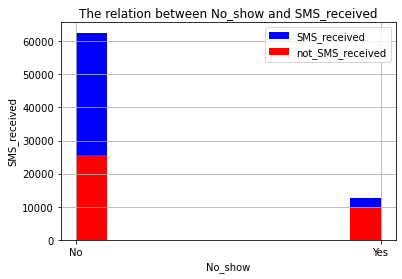

In [66]:
df.No_show[not_SMS_received].hist(label = 'SMS_received', color = 'blue')
df.No_show[SMS_received].hist(label = 'not_SMS_received', color = 'red');
plt.legend();
plt.title("The relation between No_show and SMS_received")
plt.xlabel("No_show")
plt.ylabel("SMS_received")

In [67]:
df.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

SMS_received expresses the people not received the SMS (which show up), not_SMS_received expresses the people received the SMS (which did not show up).
The people showed up more than people did not show up.

Question 5:
Did the patient show up or not?

Text(0.5, 0, 'No_show')

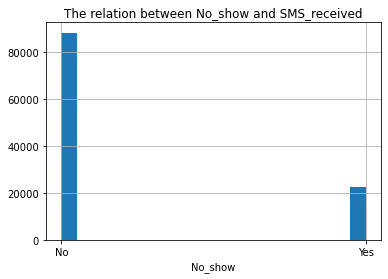

In [68]:
df.No_show.hist(bins = 20);
plt.title("The relation between No_show and SMS_received")
plt.xlabel("SMS_received")
plt.xlabel("No_show")

In [69]:
df.No_show.value_counts()


No     88208
Yes    22319
Name: No_show, dtype: int64

Most patients showed up, 22319 did not show up.

Text(0, 0.5, 'SMS_received')

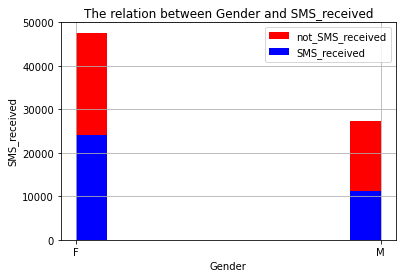

In [70]:
df.Gender[not_SMS_received].hist(label = 'not_SMS_received', color = 'red')
df.Gender[SMS_received].hist(label = 'SMS_received', color = 'blue');
plt.legend();
plt.title("The relation between Gender and SMS_received")
plt.xlabel("Gender")
plt.ylabel("SMS_received")

In [71]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

The blue color means the patients which received the SMS in male and female, the red color means total patients.

Text(0, 0.5, 'SMS_received')

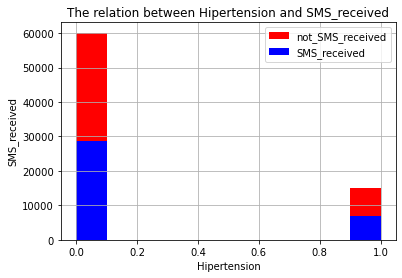

In [72]:
df.Hipertension[not_SMS_received].hist(label = 'not_SMS_received', color = 'red')
df.Hipertension[SMS_received].hist(label = 'SMS_received', color = 'blue');
plt.legend();
plt.title("The relation between Hipertension and SMS_received")
plt.xlabel("Hipertension")
plt.ylabel("SMS_received")

The blue color means the patients which received the SMS in male and female, the green color means total patients.

Text(0, 0.5, 'SMS_received')

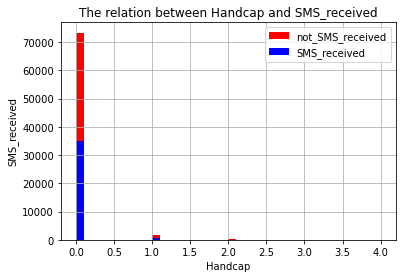

In [73]:
df.Handcap[not_SMS_received].hist(bins = 40, label = 'not_SMS_received', color = 'red')
df.Handcap[SMS_received].hist(bins = 40, label = 'SMS_received', color = 'blue');
plt.legend();
plt.title("The relation between Handcap and SMS_received")
plt.xlabel("Handcap")
plt.ylabel("SMS_received")

In [74]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

The blue color means the patients which received the SMS in male and female, the green color means total patients.

Text(0, 0.5, 'SMS_received')

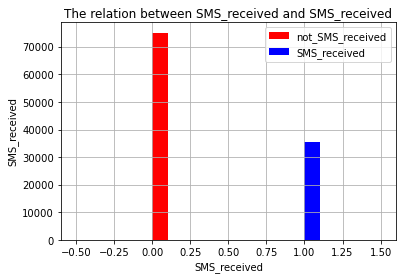

In [75]:
df.SMS_received[not_SMS_received].hist(label = 'not_SMS_received', color = 'red')
df.SMS_received[SMS_received].hist(label = 'SMS_received', color = 'blue');
plt.legend();
plt.title("The relation between SMS_received and SMS_received")
plt.xlabel("SMS_received")
plt.ylabel("SMS_received")

In [76]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

The people did not receive SMS more than people which received the SMS.
The blue color means the patients which received the SMS in male and female, the green color means total patients.

Text(0, 0.5, 'SMS_received')

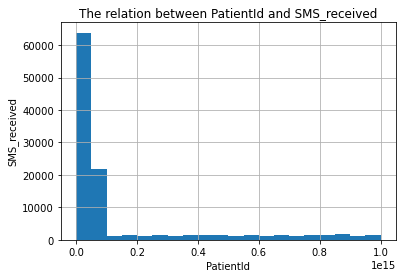

In [77]:
df.PatientId.hist(bins = 20);
plt.title("The relation between PatientId and SMS_received")
plt.xlabel("PatientId")
plt.ylabel("SMS_received")

Text(0, 0.5, 'SMS_received')

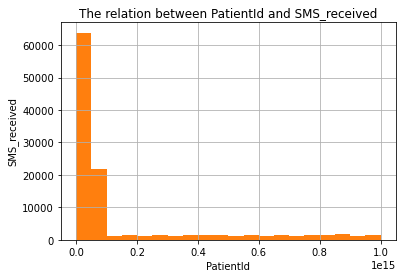

In [78]:
df.AppointmentID.hist(bins = 20);
df.PatientId.hist(bins = 20);
plt.title("The relation between PatientId and SMS_received")
plt.xlabel("PatientId")
plt.ylabel("SMS_received")

Left skewed with the majoraty being around 5.6 and 5.8

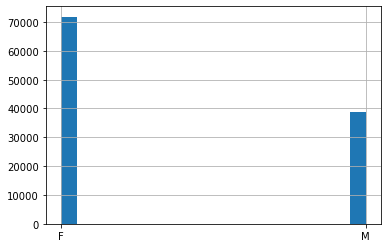

In [79]:
df.Gender.hist(bins = 20);

In [80]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

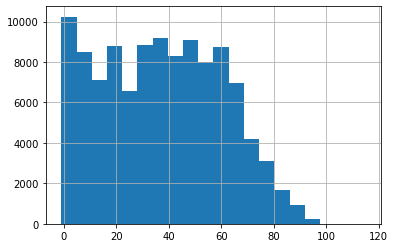

In [81]:
df.Age.hist(bins = 20);

Right Skewed with the majoraty being around 30 and 70.

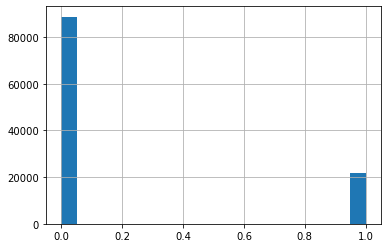

In [82]:
df.Hipertension.hist(bins = 20);

In [83]:
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

Most people not Hipertensive patient, 21801 are Hipertensive patients.

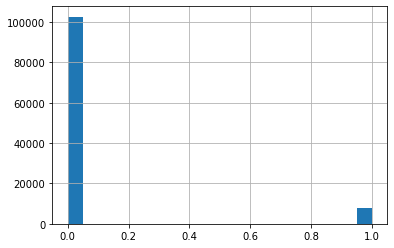

In [84]:
df.Diabetes.hist(bins = 20);

In [85]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

The diabetic patient less than the non diabetic patient, 7943 are diabetes patients.

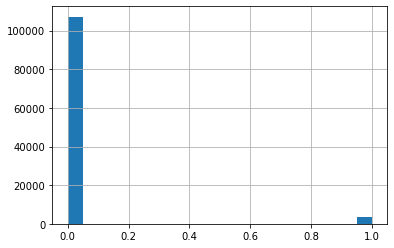

In [86]:
df.Alcoholism.hist(bins = 20);

In [87]:
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

Most people not Alcoholism, there are 3360 are Alcoholism.

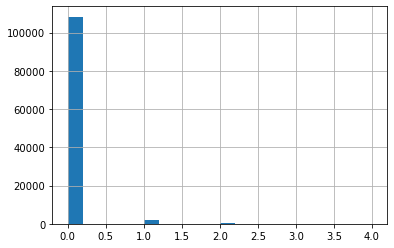

In [88]:
df.Handcap.hist(bins = 20);

In [89]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Most people did not have a Handcap.
2042 have one Handcap,
183 have 2 Handcap,
13 have 3 Handcap and 3 have 4 Handcap.

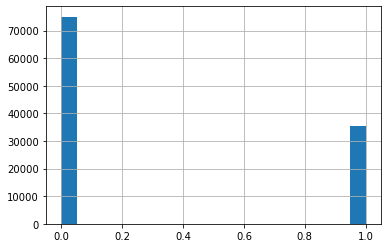

In [90]:
df.SMS_received.hist(bins = 20);

In [91]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

Most patient not received SMS, 35482 did receive SMS.

Text(0, 0.5, 'SMS_received_mean')

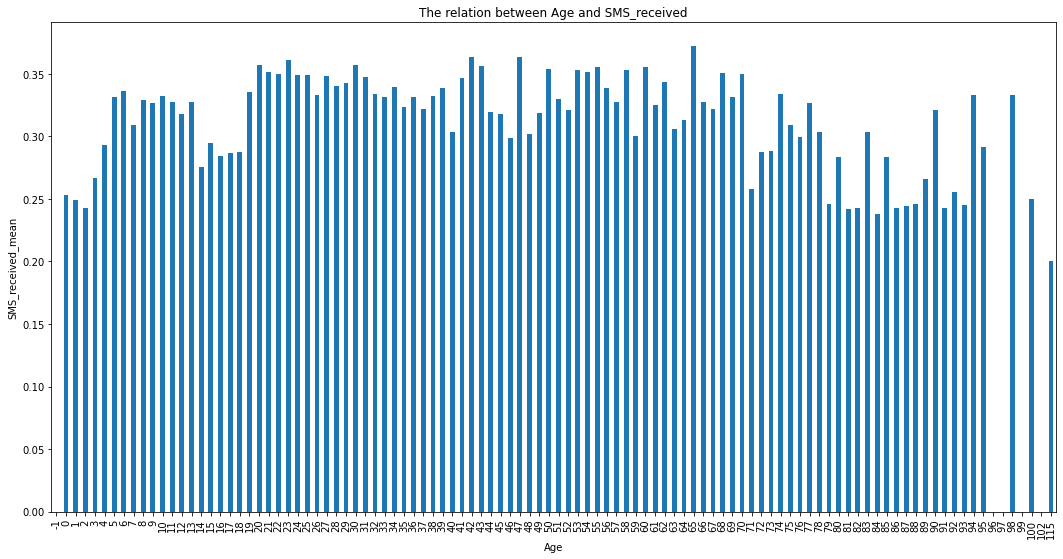

In [92]:
df.groupby('Age').SMS_received.mean().plot(kind = 'bar', figsize = (18,9));
plt.title("The relation between Age and SMS_received")
plt.xlabel("Age")
plt.ylabel("SMS_received_mean")

All ages received SMS approximately.

Text(0, 0.5, 'SMS_received_mean')

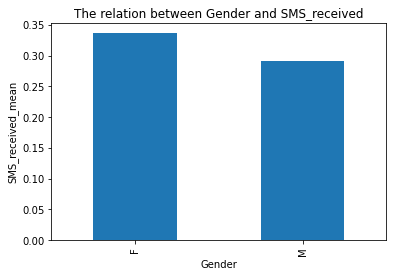

In [93]:
df.groupby('Gender').SMS_received.mean().plot(kind = 'bar');
plt.title("The relation between Gender and SMS_received")
plt.xlabel("Gender")
plt.ylabel("SMS_received_mean")

In [94]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

Female which recieved the SMS more than male.

In [95]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Text(0, 0.5, 'SMS_received_mean')

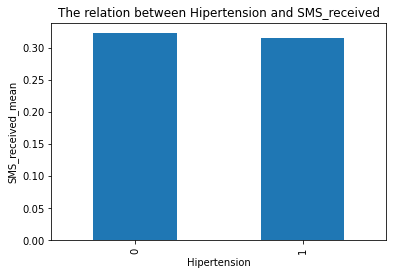

In [96]:
df.groupby('Hipertension').SMS_received.mean().plot(kind = 'bar');
plt.title("The relation between Hipertension and SMS_received")
plt.xlabel("Hipertension")
plt.ylabel("SMS_received_mean")

The Hypertensive patients which recieved SMS less than not recieved SMS.

Text(0, 0.5, 'SMS_received_mean')

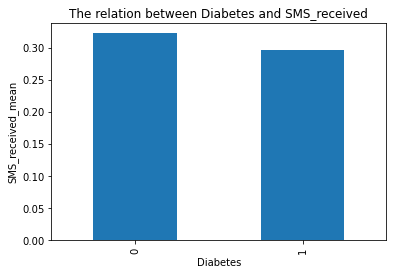

In [97]:
df.groupby('Diabetes').SMS_received.mean().plot(kind = 'bar');
plt.title("The relation between Diabetes and SMS_received")
plt.xlabel("Diabetes")
plt.ylabel("SMS_received_mean")

The diabetic patient less than the non diabetic patient.

Text(0, 0.5, 'SMS_received_mean')

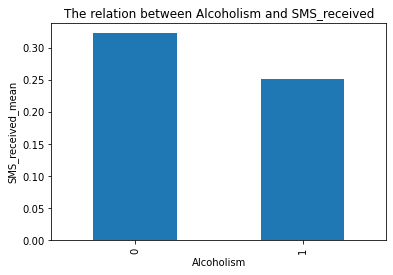

In [98]:
df.groupby('Alcoholism').SMS_received.mean().plot(kind = 'bar');
plt.title("The relation between Alcoholism and SMS_received")
plt.xlabel("Alcoholism")
plt.ylabel("SMS_received_mean")

The alcoholics less than the people Non alcoholic.

Text(0, 0.5, 'SMS_received_mean')

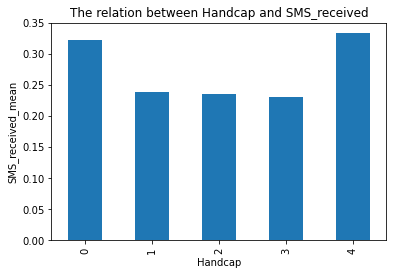

In [99]:
df.groupby('Handcap').SMS_received.mean().plot(kind = 'bar');
plt.title("The relation between Handcap and SMS_received")
plt.xlabel("Handcap")
plt.ylabel("SMS_received_mean")

Conclusion:
The people which did not receive the SMS did not set up the appointment and that impact on attend to their Neighbourhood, Scholarship which that cause on the show up of each pateint.

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295